In [16]:
# Modules
import os
import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Note: VALIDATION means we're just looking to see what is in the data
# Note: CLEANING means we've found a problem and are correcting it, or adding data as needed

In [17]:
# Save path to data set in a variable
data_file = "eviction_notices_kaggle.csv"

In [18]:
# Save path to data set in a variable
data_file_pd = pd.read_csv(data_file)
print(data_file_pd)


      Eviction ID     Fault                           Address           City  \
0        AL2K0014  At Fault      1600 Block Of Howard  Street  San Francicso   
1         E980001  At Fault        1500 Block Of 20th  Avenue  San Francicso   
2         E980002  At Fault  1500 Block Of California  Street  San Francicso   
3         E980003  At Fault     1600 Block Of Alabama  Street  San Francicso   
4         E980004  At Fault       400 Block Of Leland  Avenue  San Francicso   
...           ...       ...                               ...            ...   
41351     M2K2028     Other        1600 Block Of 39th  Avenue  San Francicso   
41352     RE02119     Other          500 Block Of Oak  Street  San Francicso   
41353     RE02124     Other         800 Block Of Post  Street  San Francicso   
41354     S000329     Other       500 Block Of Eureka  Street  San Francicso   
41355     S000500     Other        2500 Block Of 22nd  Avenue  San Francicso   

      State Eviction Notice Source Zipc

/Users/veronicalmorales/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# VALIDATION: VIEW dataset

data_file_pd = pd.read_csv(data_file)
data_file_pd.head()


,Eviction ID,Fault,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,...,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods,Location
0,AL2K0014,At Fault,1600 Block Of Howard Street,San Francicso,CA,94103,2000-02-11T00:00:00.000,False,True,False,...,False,False,True,False,False,False,NaN,6.0,Mission,"{'type': 'Point', 'coordinates': [-122.4173382..."
1,E980001,At Fault,1500 Block Of 20th Avenue,San Francicso,CA,94122,1997-12-12T00:00:00.000,False,True,False,...,False,False,False,False,False,False,NaN,4.0,Sunset/Parkside,"{'type': 'Point', 'coordinates': [-122.4779409..."
2,E980002,At Fault,1500 Block Of California Street,San Francicso,CA,NaN,1998-01-02T00:00:00.000,False,False,True,...,False,False,False,False,False,False,NaN,3.0,Nob Hill,"{'type': 'Point', 'coordinates': [-122.4198727..."
3,E980003,At Fault,1600 Block Of Alabama Street,San Francicso,CA,94110,1998-01-02T00:00:00.000,False,True,True,...,False,False,False,False,False,False,NaN,9.0,Bernal Heights,"{'type': 'Point', 'coordinates': [-122.4106005..."
4,E980004,At Fault,400 Block Of Leland Avenue,San Francicso,CA,94134,1998-01-02T00:00:00.000,False,False,False,...,False,False,True,False,False,False,NaN,10.0,Visitacion Valley,"{'type': 'Point', 'coordinates': [-122.4125124..."


In [20]:
# CLEANING: REMOVE Constraints Date because it's mostly blank

data_file_pd_1 = data_file_pd.drop(['Constraints Date'], axis=1)
#data_file_pd.isna().sum() #Check to see that the columns are gone

data_file_pd_dropna = data_file_pd_1.dropna(how='any')
#data_file_pd_dropna.isna().sum() #Check to see that the columns are gone
#len(data_file_pd_dropna["Eviction ID"])

data_file_pd_dropna_df = pd.DataFrame(data_file_pd_dropna)
len(data_file_pd_dropna_df["Eviction ID"])


39351

In [21]:
# Q: Are all the eviction IDs unique?

# VALIDATION & CLEANING: FIND (and remove) duplicate records in 'Eviction ID'

# COUNT num of eviction IDs (answer is 39351)
#len(data_file_pd_dropna['Eviction ID']) # check to see how many eviction IDs there are

# DEFINE category Set and count num of eviction IDs again (answer is 39333)
#len(set(data_file_pd_dropna['Eviction ID']))

# DROP the 9 records and their duplicates from the DB

data_file_pd_dropna_df.drop_duplicates(subset ="Eviction ID", keep = False, inplace = True)

# CONFIRM dups have been removed
len(data_file_pd_dropna_df["Eviction ID"])


39333

In [22]:
# VALIDATION: VIEW a list of all the data in column 'State' and how many records there are for each neighborhood

data_file_pd_dropna_df['State'].value_counts()

CA    39329
Ca        4
Name: State, dtype: int64

In [23]:
# CLEANING: RENAME 'Ca' to 'CA' (there are 4 of them)
data_file_pd_dropna_df['State'] = data_file_pd_dropna_df['State'].replace(
      {'Ca':'CA'})
data_file_pd_dropna_df['State'].value_counts() #Confirm all the values are now CA

CA    39333
Name: State, dtype: int64

In [24]:
# VALIDATION: VIEW a list of all the data in column 'Neighborhoods' and how many records there are for each neighborhood

data_file_pd_dropna_df['Neighborhoods'].value_counts()


Mission                           4387
Tenderloin                        2581
Sunset/Parkside                   2545
Outer Richmond                    2035
Lakeshore                         1842
Castro/Upper Market               1793
Hayes Valley                      1457
South of Market                   1425
Nob Hill                          1374
Haight Ashbury                    1296
Marina                            1254
Excelsior                         1220
Noe Valley                        1175
Inner Sunset                      1174
Bernal Heights                    1166
Pacific Heights                   1131
Bayview Hunters Point             1121
Inner Richmond                    1108
Russian Hill                       975
North Beach                        951
Oceanview/Merced/Ingleside         850
Lone Mountain/USF                  811
West of Twin Peaks                 748
Outer Mission                      696
Western Addition                   648
Potrero Hill             

In [25]:
# VALIDATION: VIEW a list of all the data in column 'Fault' and how many records there are for each

#data_file_pd_dropna_df['Fault'].value_counts()


In [26]:
# Tenant Fault Reasons bucket

non_payment = data_file_pd_dropna_df["Non Payment"].value_counts().values[1]
breach = data_file_pd_dropna_df["Breach"].value_counts().values[1]
nuisance = data_file_pd_dropna_df["Nuisance"].value_counts().values[1]
illegal_use = data_file_pd_dropna_df["Illegal Use"].value_counts().values[1]
failure_to_sign_renewal = data_file_pd_dropna_df["Failure to Sign Renewal"].value_counts().values[1]
access_denial = data_file_pd_dropna_df["Access Denial"].value_counts().values[1]
unapproved_subtenant = data_file_pd_dropna_df["Unapproved Subtenant"].value_counts().values[1]
roommate_same_unit = data_file_pd_dropna_df["Roommate Same Unit"].value_counts().values[1]
late_payments = data_file_pd_dropna_df["Late Payments"].value_counts().values[1]
lead_remediation = data_file_pd_dropna_df["Lead Remediation"].value_counts().values[1]


tenant_fault = non_payment + breach + nuisance + illegal_use + failure_to_sign_renewal + access_denial + unapproved_subtenant + roommate_same_unit + late_payments + lead_remediation
print(tenant_fault)




22510


In [27]:
# Landlord Fault Reasons bucket

owner_move_in = data_file_pd_dropna_df["Owner Move In"].value_counts().values[1]
demolition = data_file_pd_dropna_df["Demolition"].value_counts().values[1]
capital_improvement = data_file_pd_dropna_df["Capital Improvement"].value_counts().values[1]
substantial_rehab = data_file_pd_dropna_df["Substantial Rehab"].value_counts().values[1]
ellis_act_withdrawal = data_file_pd_dropna_df["Ellis Act WithDrawal"].value_counts().values[1]
condo_conversion = data_file_pd_dropna_df["Condo Conversion"].value_counts().values[1]
development = data_file_pd_dropna_df["Development"].value_counts().values[1]

landlord_fault = owner_move_in + demolition + capital_improvement + substantial_rehab + ellis_act_withdrawal + condo_conversion + development
print(landlord_fault)

16973


In [28]:
# CLEANING: CREATE a new column to hold year eviction notice was filed

data_file_pd_dropna_df["Year"] = pd.DatetimeIndex(data_file_pd_dropna_df['File Date']).year
#data_file_pd['Year'].value_counts() #to see a count of eviction notices by year

# CREATE dataframes to hold data for 2010 - 2018
df_2010 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2010]
df_2011 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2011]
df_2012 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2012]
df_2013 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2013]
df_2014 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2014]
df_2015 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2015]
df_2016 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2016]
df_2017 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2017]
df_2018 = data_file_pd_dropna_df[data_file_pd_dropna_df["Year"] == 2018]
#len(df_2010) #to see how many records are in each new df_year above
print(df_2010) # to see a list of columns


# CREATE a count of fault group by year
date_tenant_fault_2010 = df_2010 ["Non Payment"].value_counts() + df_2010['Breach'].value_counts() + df_2010['Nuisance'].value_counts() + df_2010['Illegal Use'].value_counts() + df_2010['Failure to Sign Renewal'].value_counts() + df_2010['Access Denial'].value_counts() + df_2010['Unapproved Subtenant'].value_counts() + df_2010['Roommate Same Unit'].value_counts() + df_2010['Late Payments'].value_counts()
date_tenant_fault_2011 = df_2011 ["Non Payment"].value_counts() + df_2011['Breach'].value_counts() + df_2011['Nuisance'].value_counts() + df_2011['Illegal Use'].value_counts() + df_2011['Failure to Sign Renewal'].value_counts() + df_2011['Access Denial'].value_counts() + df_2011['Unapproved Subtenant'].value_counts() + df_2011['Roommate Same Unit'].value_counts() + df_2011['Late Payments'].value_counts()
date_tenant_fault_2012 = df_2012 ["Non Payment"].value_counts() + df_2012['Breach'].value_counts() + df_2012['Nuisance'].value_counts() + df_2012['Illegal Use'].value_counts() + df_2012['Failure to Sign Renewal'].value_counts() + df_2012['Access Denial'].value_counts() + df_2012['Unapproved Subtenant'].value_counts() + df_2012['Roommate Same Unit'].value_counts() + df_2012['Late Payments'].value_counts()
date_tenant_fault_2013 = df_2013 ["Non Payment"].value_counts() + df_2013['Breach'].value_counts() + df_2013['Nuisance'].value_counts() + df_2013['Illegal Use'].value_counts() + df_2013['Failure to Sign Renewal'].value_counts() + df_2013['Access Denial'].value_counts() + df_2013['Unapproved Subtenant'].value_counts() + df_2013['Roommate Same Unit'].value_counts() + df_2013['Late Payments'].value_counts()
date_tenant_fault_2014 = df_2014 ["Non Payment"].value_counts() + df_2014['Breach'].value_counts() + df_2014['Nuisance'].value_counts() + df_2014['Illegal Use'].value_counts() + df_2014['Failure to Sign Renewal'].value_counts() + df_2014['Access Denial'].value_counts() + df_2014['Unapproved Subtenant'].value_counts() + df_2014['Roommate Same Unit'].value_counts() + df_2014['Late Payments'].value_counts()
date_tenant_fault_2015 = df_2015 ["Non Payment"].value_counts() + df_2015['Breach'].value_counts() + df_2015['Nuisance'].value_counts() + df_2015['Illegal Use'].value_counts() + df_2015['Failure to Sign Renewal'].value_counts() + df_2015['Access Denial'].value_counts() + df_2015['Unapproved Subtenant'].value_counts() + df_2015['Roommate Same Unit'].value_counts() + df_2015['Late Payments'].value_counts()
date_tenant_fault_2016 = df_2016 ["Non Payment"].value_counts() + df_2016['Breach'].value_counts() + df_2016['Nuisance'].value_counts() + df_2016['Illegal Use'].value_counts() + df_2016['Failure to Sign Renewal'].value_counts() + df_2016['Access Denial'].value_counts() + df_2016['Unapproved Subtenant'].value_counts() + df_2016['Roommate Same Unit'].value_counts() + df_2016['Late Payments'].value_counts()
date_tenant_fault_2017 = df_2017 ["Non Payment"].value_counts() + df_2017['Breach'].value_counts() + df_2017['Nuisance'].value_counts() + df_2017['Illegal Use'].value_counts() + df_2017['Failure to Sign Renewal'].value_counts() + df_2017['Access Denial'].value_counts() + df_2017['Unapproved Subtenant'].value_counts() + df_2017['Roommate Same Unit'].value_counts() + df_2017['Late Payments'].value_counts()
date_tenant_fault_2018 = df_2018 ["Non Payment"].value_counts() + df_2018['Breach'].value_counts() + df_2018['Nuisance'].value_counts() + df_2018['Illegal Use'].value_counts() + df_2018['Failure to Sign Renewal'].value_counts() + df_2018['Access Denial'].value_counts() + df_2018['Unapproved Subtenant'].value_counts() + df_2018['Roommate Same Unit'].value_counts() + df_2018['Late Payments'].value_counts()

# CREATE a count of fault group for entire dataset
tenant_fault_all_years = data_file_pd_dropna_df ["Non Payment"].value_counts() + data_file_pd['Breach'].value_counts() + data_file_pd['Nuisance'].value_counts() + data_file_pd['Illegal Use'].value_counts() + data_file_pd['Failure to Sign Renewal'].value_counts() + data_file_pd['Access Denial'].value_counts() + data_file_pd['Unapproved Subtenant'].value_counts() + data_file_pd['Roommate Same Unit'].value_counts() + data_file_pd['Late Payments'].value_counts()


# CREATE no-fault group
date_tenant_no_fault_2010 = df_2010 ["Owner Move In"].value_counts() + df_2010['Demolition'].value_counts() + df_2010['Capital Improvement'].value_counts() + df_2010['Substantial Rehab'].value_counts() + df_2010['Ellis Act WithDrawal'].value_counts() + df_2010['Condo Conversion'].value_counts() + df_2010['Development'].value_counts() + df_2010['Lead Remediation'].value_counts() + df_2010['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2011 = df_2011 ["Owner Move In"].value_counts() + df_2011['Demolition'].value_counts() + df_2011['Capital Improvement'].value_counts() + df_2011['Substantial Rehab'].value_counts() + df_2011['Ellis Act WithDrawal'].value_counts() + df_2011['Condo Conversion'].value_counts() + df_2011['Development'].value_counts() + df_2011['Lead Remediation'].value_counts() + df_2011['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2012 = df_2012 ["Owner Move In"].value_counts() + df_2012['Demolition'].value_counts() + df_2012['Capital Improvement'].value_counts() + df_2012['Substantial Rehab'].value_counts() + df_2012['Ellis Act WithDrawal'].value_counts() + df_2012['Condo Conversion'].value_counts() + df_2012['Development'].value_counts() + df_2012['Lead Remediation'].value_counts() + df_2012['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2013 = df_2013 ["Owner Move In"].value_counts() + df_2013['Demolition'].value_counts() + df_2013['Capital Improvement'].value_counts() + df_2013['Substantial Rehab'].value_counts() + df_2013['Ellis Act WithDrawal'].value_counts() + df_2013['Condo Conversion'].value_counts() + df_2013['Development'].value_counts() + df_2013['Lead Remediation'].value_counts() + df_2013['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2014 = df_2014 ["Owner Move In"].value_counts() + df_2014['Demolition'].value_counts() + df_2014['Capital Improvement'].value_counts() + df_2014['Substantial Rehab'].value_counts() + df_2014['Ellis Act WithDrawal'].value_counts() + df_2014['Condo Conversion'].value_counts() + df_2014['Development'].value_counts() + df_2014['Lead Remediation'].value_counts() + df_2014['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2015 = df_2015 ["Owner Move In"].value_counts() + df_2015['Demolition'].value_counts() + df_2015['Capital Improvement'].value_counts() + df_2015['Substantial Rehab'].value_counts() + df_2015['Ellis Act WithDrawal'].value_counts() + df_2015['Condo Conversion'].value_counts() + df_2015['Development'].value_counts() + df_2015['Lead Remediation'].value_counts() + df_2015['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2016 = df_2016 ["Owner Move In"].value_counts() + df_2016['Demolition'].value_counts() + df_2016['Capital Improvement'].value_counts() + df_2016['Substantial Rehab'].value_counts() + df_2016['Ellis Act WithDrawal'].value_counts() + df_2016['Condo Conversion'].value_counts() + df_2016['Development'].value_counts() + df_2016['Lead Remediation'].value_counts() + df_2016['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2017 = df_2017 ["Owner Move In"].value_counts() + df_2017['Demolition'].value_counts() + df_2017['Capital Improvement'].value_counts() + df_2017['Substantial Rehab'].value_counts() + df_2017['Ellis Act WithDrawal'].value_counts() + df_2017['Condo Conversion'].value_counts() + df_2017['Development'].value_counts() + df_2017['Lead Remediation'].value_counts() + df_2017['Good Samaritan Ends'].value_counts()
date_tenant_no_fault_2018 = df_2018 ["Owner Move In"].value_counts() + df_2018['Demolition'].value_counts() + df_2018['Capital Improvement'].value_counts() + df_2018['Substantial Rehab'].value_counts() + df_2018['Ellis Act WithDrawal'].value_counts() + df_2018['Condo Conversion'].value_counts() + df_2018['Development'].value_counts() + df_2018['Lead Remediation'].value_counts() + df_2018['Good Samaritan Ends'].value_counts()

# CREATE no-fault group for entire dataset
tenant_no_fault_all_years = data_file_pd_dropna_df ["Owner Move In"].value_counts() + data_file_pd['Demolition'].value_counts() + data_file_pd['Capital Improvement'].value_counts() + data_file_pd['Substantial Rehab'].value_counts() + data_file_pd['Ellis Act WithDrawal'].value_counts() + data_file_pd['Condo Conversion'].value_counts() + data_file_pd['Development'].value_counts() + data_file_pd['Lead Remediation'].value_counts() + data_file_pd['Good Samaritan Ends'].value_counts()

# View files
df_2010.head()

# CREATE datasets of fault and no-fault
df_tenant_at_fault = data_file_pd_dropna_df[data_file_pd_dropna_df["Fault"] == "At Fault"]
df_tenant_no_fault = data_file_pd_dropna_df[data_file_pd_dropna_df["Fault"] == "No Fault"]


      Eviction ID     Fault                        Address           City  \
9557      M100031  At Fault    0 Block Of Locksley  Avenue  San Francicso   
9558      M100032  At Fault   100 Block Of Chester  Avenue  San Francicso   
9559      M100033  At Fault         0 Block Of 6th  Street  San Francicso   
9561      M100035  At Fault   200 Block Of Ralston  Street  San Francicso   
9562      M100036  At Fault   800 Block Of Burnett  Avenue  San Francicso   
...           ...       ...                            ...            ...   
40554     M101691     Other  1400 Block Of Quesada  Avenue  San Francicso   
40555     M101787     Other     2800 Block Of Bush  Street  San Francicso   
40556     M101834     Other     0 Block Of Seville  Street  San Francicso   
40579     M110660     Other     2800 Block Of 25th  Street  San Francicso   
40580     M110661     Other    200 Block Of Bocana  Street  San Francicso   

      State Eviction Notice Source Zipcode                File Date  \
9557

In [29]:
data_file_pd_dropna_df['Neighborhoods'].value_counts()


Mission                           4387
Tenderloin                        2581
Sunset/Parkside                   2545
Outer Richmond                    2035
Lakeshore                         1842
Castro/Upper Market               1793
Hayes Valley                      1457
South of Market                   1425
Nob Hill                          1374
Haight Ashbury                    1296
Marina                            1254
Excelsior                         1220
Noe Valley                        1175
Inner Sunset                      1174
Bernal Heights                    1166
Pacific Heights                   1131
Bayview Hunters Point             1121
Inner Richmond                    1108
Russian Hill                       975
North Beach                        951
Oceanview/Merced/Ingleside         850
Lone Mountain/USF                  811
West of Twin Peaks                 748
Outer Mission                      696
Western Addition                   648
Potrero Hill             

In [30]:
# # # # # # # #  GRAPHING # # # # # # # #

In [31]:
# Q: Has the SF eviction rate gone up or down from 2010 to 2018?
# CREATE Graph #1 showing num of eviction notices per year, for the entire dataset

# data_file_pd_dropna = data_file_pd_dropna.dataframe({
#     "Num of Eviction Notices"
#     index=[2010, 2011]
# # })

# plt.plot(data_file_pd_dropna["Year"], data_file_pd_dropna)

# # Give our graph axis labels
# plt.xlabel("Year")
# plt.ylabel("Eviction Notices")

# # Have to plot our chart once again as it doesn't stick after being shown
# plt.plot(x_axis, e_x)
# plt.show()


In [32]:
# VALIDATION: VIEW a count of eviction notices by year from the new Year column

evictionperyear = data_file_pd_dropna_df['Year'].value_counts().sort_index()

evictionperyeardf = pd.DataFrame(evictionperyear)
evictionperyeardf = evictionperyeardf.reset_index()

In [33]:
data_file_pd_dropna_df['Year'].value_counts().sort_index()

1997    1751
1998    2786
1999    2416
2000    2480
2001    2060
2002    1570
2003    1493
2004    1393
2005    1495
2006    1437
2007    1449
2008    1385
2009    1143
2010    1322
2011    1268
2012    1601
2013    1825
2014    1912
2015    2062
2016    2104
2017    1523
2018    1609
2019    1249
Name: Year, dtype: int64

In [34]:
evictionperyear = data_file_pd_dropna_df['Year'].value_counts().sort_index()
evictionperyear = pd.DataFrame(evictionperyear)
evictionperyear = evictionperyear.reset_index()
evictionperyeardf = evictionperyear.rename(columns={'Year':'Evictions', "index":  "Year"})
#evictionperyear = evictionperyear.reset_index()

evictionperyeardf

,Year,Evictions
0,1997,1751
1,1998,2786
2,1999,2416
3,2000,2480
4,2001,2060
5,2002,1570
6,2003,1493
7,2004,1393
8,2005,1495
9,2006,1437


In [35]:
evictionperyeardf.columns

Index(['Year', 'Evictions'], dtype='object')

In [36]:
x = list(evictionperyeardf["Year"])
y = list(evictionperyeardf["Evictions"])
print(x)
print(y)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[1751, 2786, 2416, 2480, 2060, 1570, 1493, 1393, 1495, 1437, 1449, 1385, 1143, 1322, 1268, 1601, 1825, 1912, 2062, 2104, 1523, 1609, 1249]


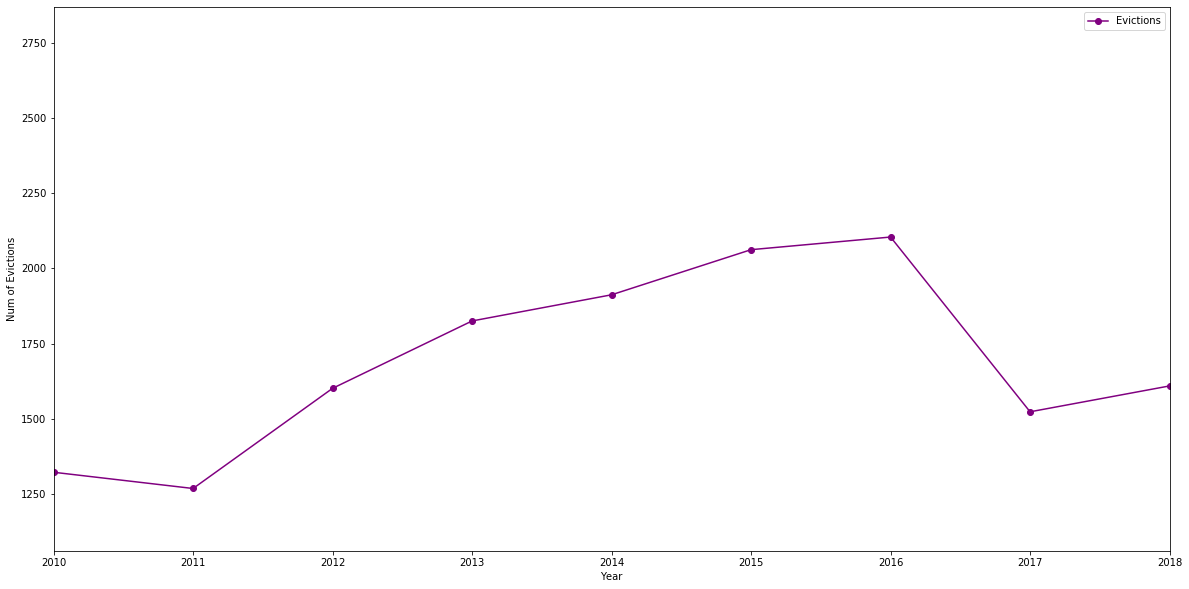

In [37]:
lines = evictionperyeardf.plot.line(x='Year', y='Evictions', marker="o", color="purple", xlim=(2010, 2018), figsize = (20, 10))
lines.set_ylabel("Num of Evictions")

plt.savefig("graph_1_solene.png")


<img style="transform: rotate(90deg); width:500px" src="graph_1.jpg"/>

In [38]:
# Q: Does the eviction rate differ by district in SF? Which neighborhoods have highest/lowest 
# CREATE Graph #2 showing num of eviction notices per year, per district
# CREATE Graph #2 Do a bar graph for years 2010 and 2018 that shows num of evictions for each distict
# x-axis is district, y-axis is num of evictions


# VIEW count of evictions per district for entire dataset
evictionperdistrict_2015 = df_2015['Supervisor District'].value_counts()
evictionperdistrict_2016 = df_2016['Supervisor District'].value_counts()
evictionperdistrict_2017 = df_2017['Supervisor District'].value_counts()
evictionperdistrict_2018 = df_2018['Supervisor District'].value_counts()
#evictionperdistrict_2018

In [39]:
# Create a dataframe holding the District ID and District Neighborhoods
districtname_df = pd.DataFrame({
    "Supervisor District": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
    "District Neighborhoods": ["The Richmond", "Pacific Heights/Sea Cliff/Marina", "Chinatown/North Beach/Russian Hill", "The Sunset", "Haight/Western Addition", "SOMA/The Tenderloin/North Mission", "West of Twin Peaks", "The Castro/Noe Valley/Glen Park/Diamond Heights", "The Mission/Bernal Heights/Portola", "Bayview-Hunters Point/Visitacion Valley/Potrero Hill", "The Excelsior/Ocean View"]
})
districtname_df


,Supervisor District,District Neighborhoods
0,1.0,The Richmond
1,2.0,Pacific Heights/Sea Cliff/Marina
2,3.0,Chinatown/North Beach/Russian Hill
3,4.0,The Sunset
4,5.0,Haight/Western Addition
5,6.0,SOMA/The Tenderloin/North Mission
6,7.0,West of Twin Peaks
7,8.0,The Castro/Noe Valley/Glen Park/Diamond Heights
8,9.0,The Mission/Bernal Heights/Portola
9,10.0,Bayview-Hunters Point/Visitacion Valley/Potrer...


In [40]:
# Join districtname_df and df_2010 on 'Supervisor District'

merge_2015_districtname_df = pd.merge(districtname_df, df_2015, on="Supervisor District")
merge_2016_districtname_df = pd.merge(districtname_df, df_2016, on="Supervisor District")
merge_2017_districtname_df = pd.merge(districtname_df, df_2017, on="Supervisor District")
merge_2018_districtname_df = pd.merge(districtname_df, df_2018, on="Supervisor District")
merge_2018_districtname_df

,Supervisor District,District Neighborhoods,Eviction ID,Fault,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,...,Condo Conversion,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Neighborhoods,Location,Year
0,1.0,The Richmond,M180012,At Fault,300 Block Of Parker Avenue,San Francicso,CA,94118,2018-01-04T00:00:00.000,False,...,False,False,False,False,False,False,False,Lone Mountain/USF,"{'type': 'Point', 'coordinates': [-122.4538592...",2018
1,1.0,The Richmond,M180067,At Fault,700 Block Of 20th Avenue,San Francicso,CA,94121,2018-01-11T00:00:00.000,False,...,False,False,False,False,False,False,False,Outer Richmond,"{'type': 'Point', 'coordinates': [-122.4789734...",2018
2,1.0,The Richmond,M180092,At Fault,4400 Block Of California Street,San Francicso,CA,94118,2018-01-17T00:00:00.000,False,...,False,False,False,False,False,False,False,Inner Richmond,"{'type': 'Point', 'coordinates': [-122.4650907...",2018
3,1.0,The Richmond,M180107,At Fault,800 Block Of 27th Avenue,San Francicso,CA,94121,2018-01-19T00:00:00.000,True,...,False,False,False,False,False,False,False,Outer Richmond,"{'type': 'Point', 'coordinates': [-122.4863322...",2018
4,1.0,The Richmond,M180157,At Fault,200 Block Of 12th Avenue,San Francicso,CA,94118,2018-01-23T00:00:00.000,False,...,False,False,False,False,False,False,False,Inner Richmond,"{'type': 'Point', 'coordinates': [-122.4708446...",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,11.0,The Excelsior/Ocean View,M183475,No Fault,400 Block Of Madrid Street,San Francicso,CA,94112,2018-12-24T00:00:00.000,False,...,False,False,False,False,False,False,False,Excelsior,"{'type': 'Point', 'coordinates': [-122.4322788...",2018
1605,11.0,The Excelsior/Ocean View,M182095,Other,200 Block Of Theresa Street,San Francicso,CA,94112,2018-07-16T00:00:00.000,False,...,False,False,True,False,False,False,False,Outer Mission,"{'type': 'Point', 'coordinates': [-122.4358155...",2018
1606,11.0,The Excelsior/Ocean View,M182411,Other,500 Block Of Naples Street,San Francicso,CA,94112,2018-08-15T00:00:00.000,False,...,False,False,True,False,False,False,False,Excelsior,"{'type': 'Point', 'coordinates': [-122.4318543...",2018
1607,11.0,The Excelsior/Ocean View,M182699,Other,4700 Block Of Mission Street,San Francicso,CA,94112,2018-09-26T00:00:00.000,False,...,False,False,False,False,False,False,False,Excelsior,"{'type': 'Point', 'coordinates': [-122.4361944...",2018


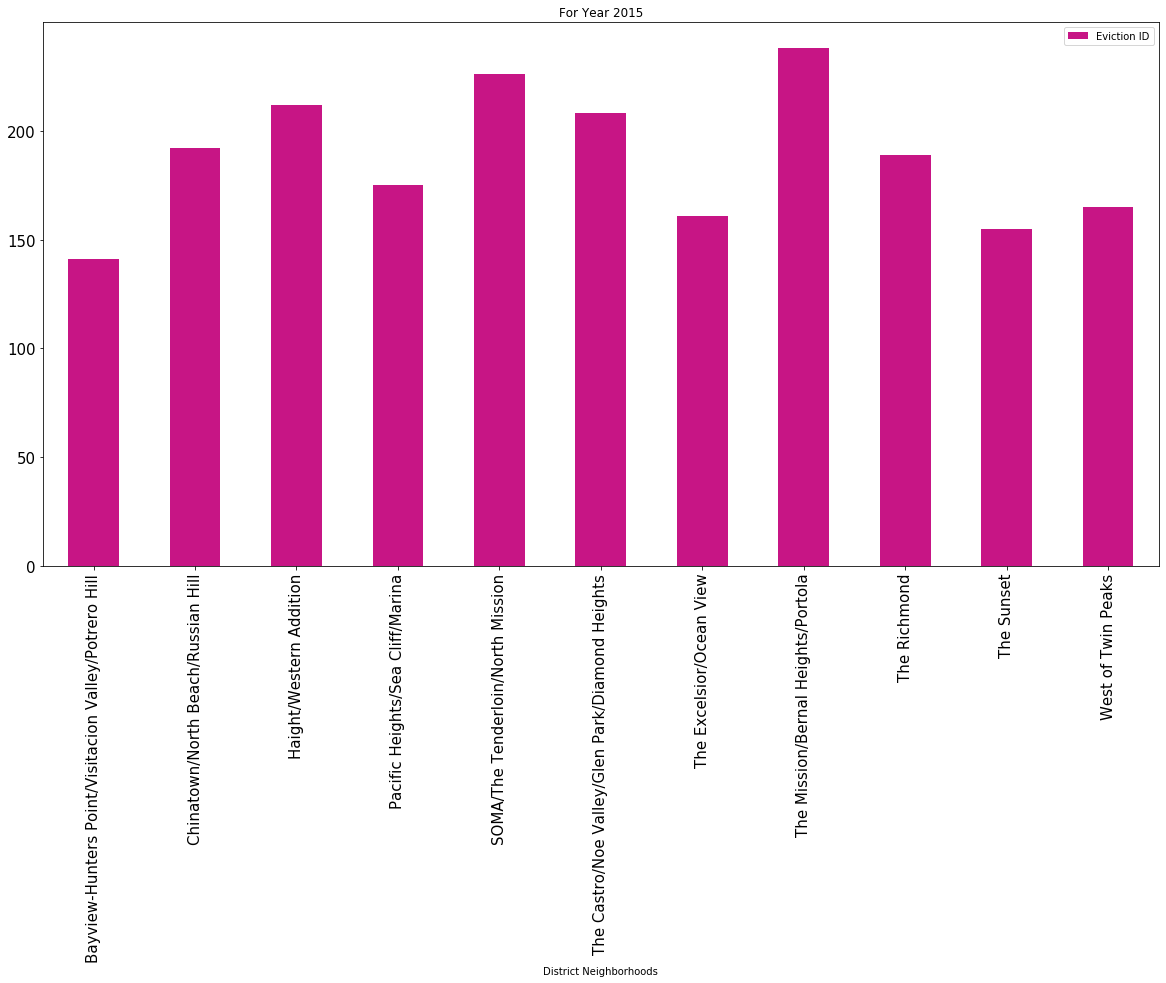

In [41]:
gb_2015 = merge_2015_districtname_df.groupby("District Neighborhoods").count()["Eviction ID"]
count_2015 = pd.DataFrame(gb_2015)
#count_2015 = count_2015.reset_index()
count_2015.plot(kind="bar", color='mediumvioletred', fontsize = 15, title = 'For Year 2015', figsize = (20, 10)) #colormap for pandas plot
plt.savefig("graph_2_2015.png")


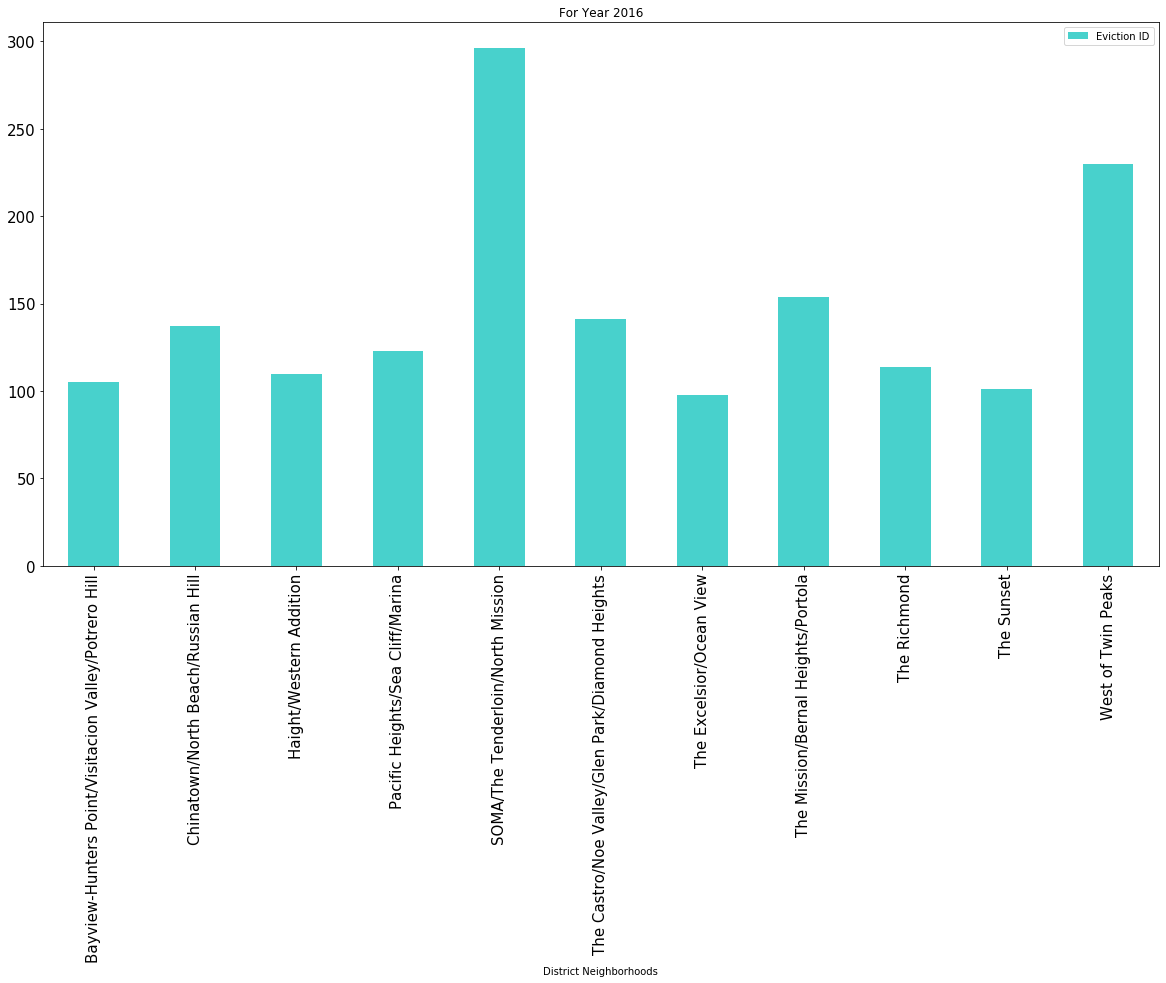

In [42]:
gb_2016 = merge_2018_districtname_df.groupby("District Neighborhoods").count()["Eviction ID"]
count_2016 = pd.DataFrame(gb_2016)
#count_2016 = count_2016.reset_index()
count_2016.plot(kind="bar", color='mediumturquoise', fontsize = 15, title = 'For Year 2016', figsize = (20, 10)) #colormap for pandas plot
plt.savefig("graph_2_2016.png")


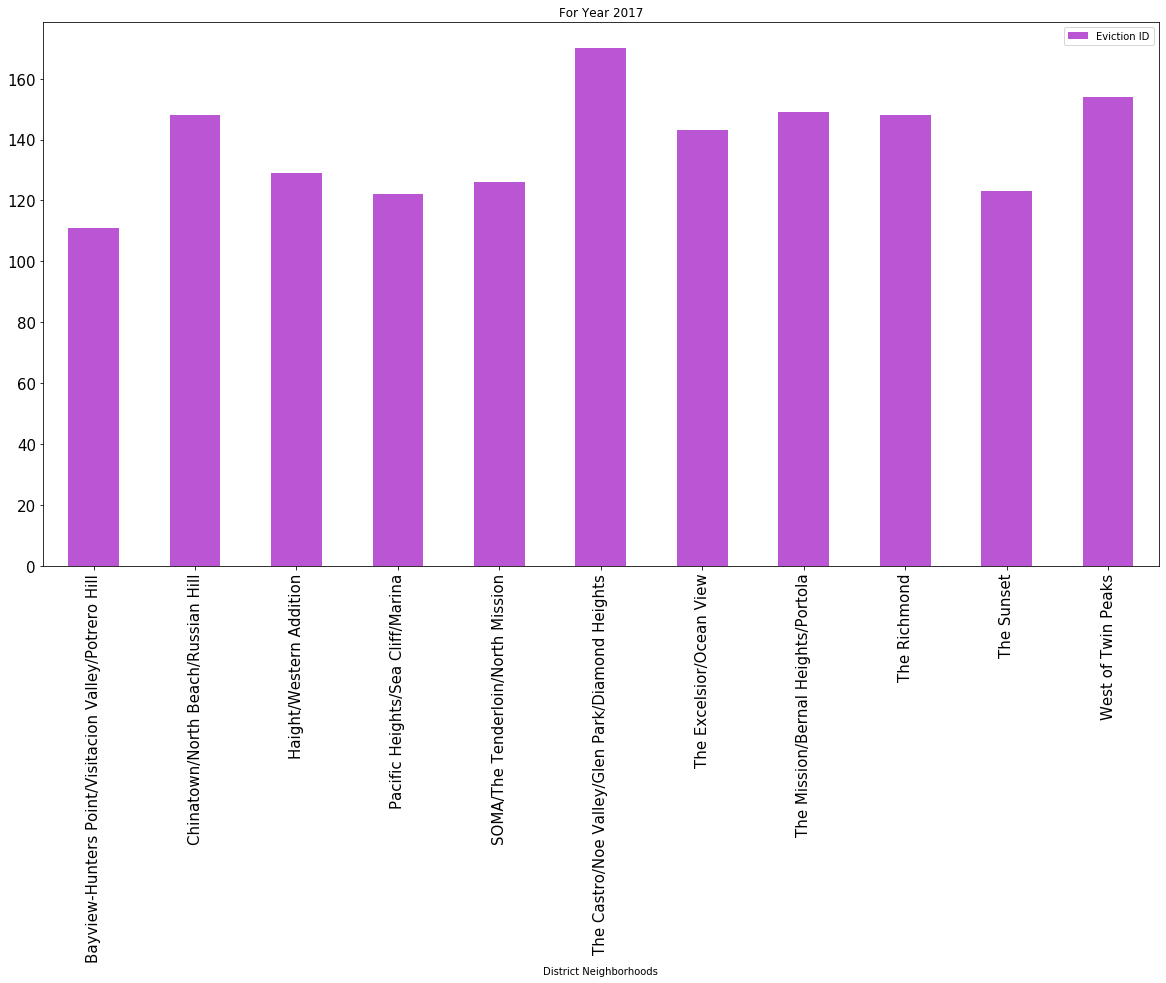

In [43]:
gb_2017 = merge_2017_districtname_df.groupby("District Neighborhoods").count()["Eviction ID"]
count_2017 = pd.DataFrame(gb_2017)
#count_2017 = count_2017.reset_index()
count_2017.plot(kind="bar", color='mediumorchid', fontsize = 15, title = 'For Year 2017', figsize = (20, 10)) #colormap for pandas plot
plt.savefig("graph_2_2017.png")


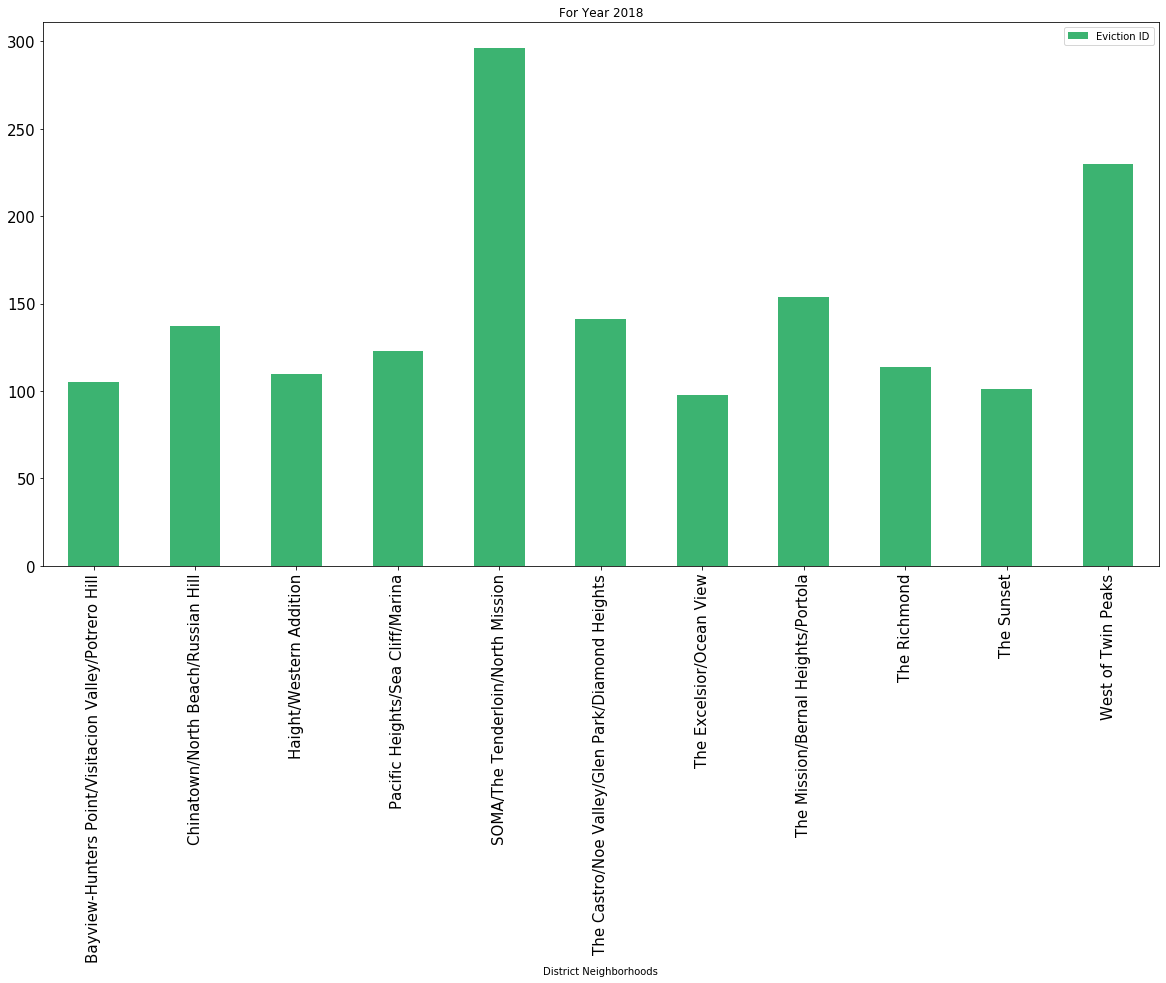

In [44]:
gb_2018 = merge_2018_districtname_df.groupby("District Neighborhoods").count()["Eviction ID"]
count_2018 = pd.DataFrame(gb_2018)
#count_2018 = count_2017.reset_index()
count_2018.plot(kind="bar", color='mediumseagreen', fontsize = 15, title = 'For Year 2018', figsize = (20, 10)) #colormap for pandas plot
plt.savefig("graph_2_2018.png")


<img style="transform: rotate(90deg); width:500px" src="graph_2b.jpg" />

In [45]:
# Q: Over time, has evictions increased or decreased for each fault and no-fault categories?
# CREATE Line chart showing num of eviction notices per year, by fault and no-fault for all of SF

# EXAMPLE FROM CLASS WORK
# # Plot the world average as a line chart
# fault_vs_no_fault = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# # Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# # Create a legend for our chart
# plt.legend(handles=[world_avg, country_one], loc="best")

# # Show the chart
# plt.show()

#*******************************************

faultevictionperyear = df_tenant_at_fault['Year'].value_counts().sort_index()
faultevictionperyear = pd.DataFrame(faultevictionperyear)
faultevictionperyear = faultevictionperyear.reset_index()
faultevictionperyear_df = faultevictionperyear.rename(columns={'Year':'Evictions', "index":  "Year"})
#evictionperyear = evictionperyear.reset_index()

faultevictionperyear_df

,Year,Evictions
0,1997,491
1,1998,905
2,1999,1012
3,2000,914
4,2001,874
5,2002,700
6,2003,783
7,2004,608
8,2005,762
9,2006,788


In [46]:
# # #****** As a scatter plot *******

# # x_axis = (faultevictionperyear_df["Year"])
# # y_axis = (faultevictionperyear_df["Evictions"])

# # plt.scatter(x_axis, y_axis, marker='o', facecolors='red')


# # x_axis = (nofaultevictionperyear_df["Year"])
# # y_axis = (nofaultevictionperyear_df["Evictions"])

# # plt.scatter(x_axis, y_axis, marker='o', facecolors='green' )



# # ****** As a line chart *******

# faultevictionperyear_df.plot(kind="line", x='Year', y='Evictions', color='mediumseagreen', fontsize = 15, title = 'For Year 2017', figsize = (20, 10)) #colormap for pandas plot
# nofaultevictionperyear_df.plot(kind="line", x='Year', y='Evictions', color='mediumorchid', fontsize = 15, title = 'For Year 2017', figsize = (20, 10)) #colormap for pandas plot


In [47]:
x_fault = list(faultevictionperyear_df["Year"])
y_fault = list(faultevictionperyear_df["Evictions"])
print(x_fault)
print(y_fault)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[491, 905, 1012, 914, 874, 700, 783, 608, 762, 788, 897, 908, 874, 904, 940, 948, 1093, 1368, 1319, 1192, 930, 940, 837]


NameError: name 'nofaultevictionperyear_df' is not defined

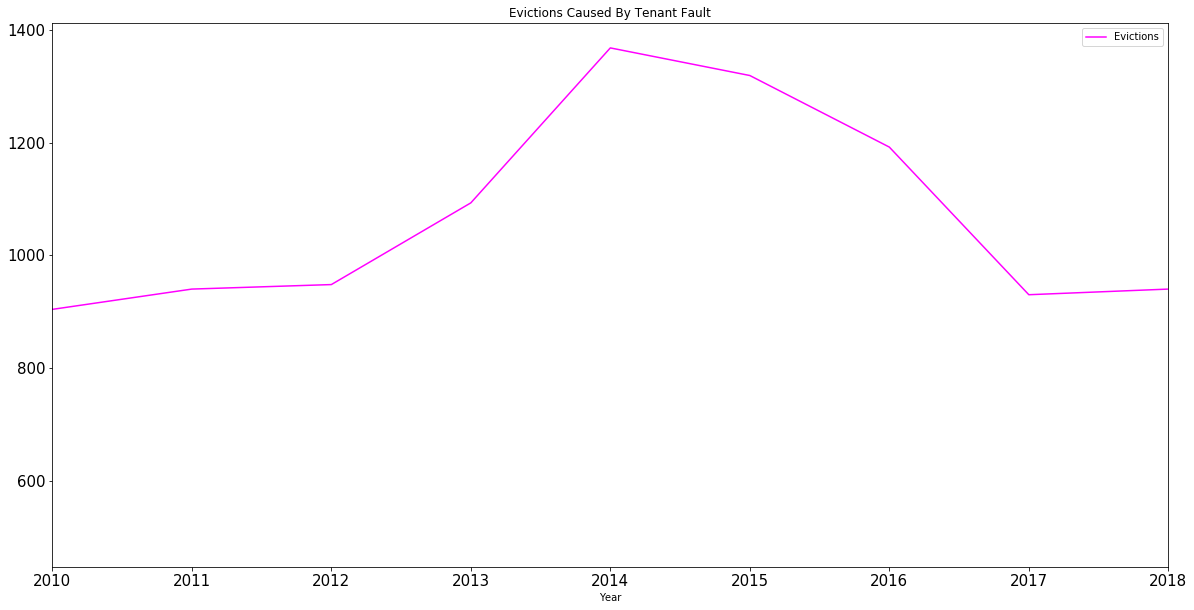

In [48]:
faultvsnofault_graph = faultevictionperyear_df.plot.line(x='Year', y='Evictions', fontsize = 15, color = "magenta", xlim=(2010, 2018), title = 'Evictions Caused By Tenant Fault', figsize = (20, 10))
plt.savefig("graph_3_atfault.png")


faultvsnofault_graph = nofaultevictionperyear_df.plot.line(x='Year', y='Evictions', fontsize = 15, color = "green", xlim=(2010, 2018), title = 'Evictions Not Caused By Tenant', figsize = (20, 10))
plt.savefig("graph_3_nofault.png")

# faultvsnofault_graph.set_ylabel("Num of Evictions")
# #nofault_lines.set_ylabel("Num of Evictions") #look into matplotlib scatter

# fontsize = 15, title = 'For Year 2017', figsize = (20, 10)) #colormap for pandas plot









In [49]:
# DONE: VERONICA HAS THIS ONE

# Q: Are tenants being evicted mostly because of things they do? Or are they being evicted through no fault of their own?
# CREATE Graph #3 showing % of fault vs no-fault evictions in entire dataset



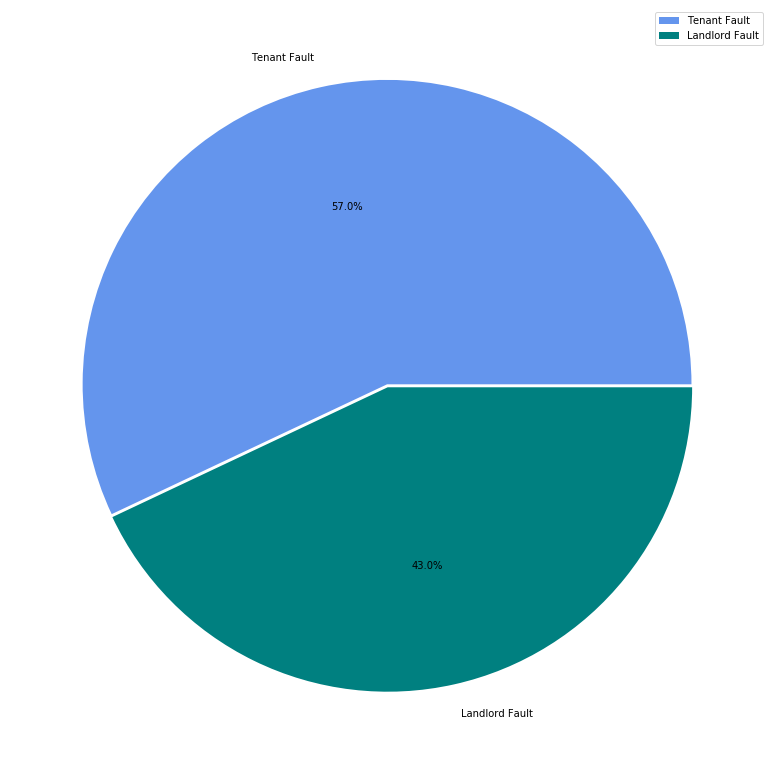

In [50]:
labels = ["Tenant Fault", "Landlord Fault"]
sizes = [tenant_fault, landlord_fault]
explode = (0.01, 0)
colors = ["cornflowerblue","teal"]
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
ax.pie(sizes, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%")
plt.legend(loc="best")
#plt.show()

plt.savefig("graph_4_pie.png")


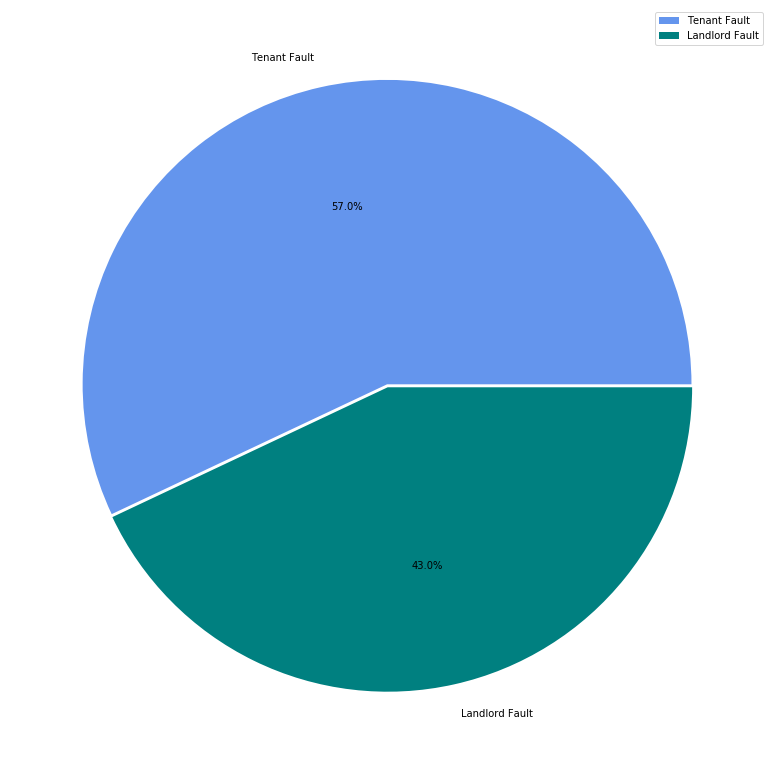

In [51]:
labels = ["Tenant Fault", "Landlord Fault"]
sizes = [tenant_fault, landlord_fault]
explode = (0.01, 0)
colors = ["cornflowerblue","teal"]
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
ax.pie(sizes, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%")
plt.legend(loc="best")
#plt.show()

plt.savefig("graph_4_pie.png")

df_tenant_at_fault = data_file_pd_dropna_df[data_file_pd_dropna_df["Fault"] == "At Fault"]
df_tenant_no_fault = data_file_pd_dropna_df[data_file_pd_dropna_df["Fault"] == "No Fault"]



<img style="transform: rotate(90deg); width:500px" src="graph_3.jpg" />

In [52]:
# Q: Is there a higher eviction rate in areas where tech companies are suppposedly displacing residents?
# CREATE Graph #4 showing num of eviction notices per year, grouped into Tech-influnced neighborhoods and non
# CREATE delinations for 
    # Tech-influeced neighborhoods = Financial District, South of Market
    # non-TEch-influenced neighborhoods = everything else

<img style="transform: rotate(90deg); width:500px" src="graph_4.jpg" />

In [53]:
# Q: Do we see a shift in fault vs no-fault reasons for evictions in tech-influenced neighborhoods?
# CREATE Graph #6 showing num of eviction notices per year, broken down by fault and no-fault

<img style="transform: rotate(90deg); width:500px" src="graph_6.jpg" />

In [54]:
# Q: For comparison, same graph as above but for the rest of SF neighborhoods (no whiteboard image)
# CREATE Graph #7 showing num of eviction notices per year, broken down by fault and no-fault